In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
%load_ext autoreload
%autoreload

df = pd.read_csv('adyen-dataset.csv')

In [2]:
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False


In [3]:
df['no_ip'] = df['ip_address'].isnull()
df['no_email'] = df['email_address'].isnull()
df.head()

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,...,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen,no_ip,no_email
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,...,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,...,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,...,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,...,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True,False,False
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,...,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False,True,False


Upsampling & Subsampling

In [4]:
from lib.sampling import subsampling

# Subsample non_fraudulent transactions records so we have balanced dataset
df_fraudulent = df[df['has_fraudulent_dispute'] == True]
df_non_fraudulent = df[df['has_fraudulent_dispute'] == False]
subsample_index= subsampling(df_non_fraudulent.index, len(df_fraudulent))
df_non_fraudulent_subsample  = df_non_fraudulent.loc[subsample_index,:]
df_sample = pd.concat([df_non_fraudulent_subsample,df_fraudulent], axis=0)
df_sample.shape

(21432, 22)

Correlation Matrix

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

Choose feature: merchant, card_scheme, is_credit, eur_amount, ip_country, device_type, shopper_interaction, zip_code, card_bin

In [5]:
df_sample = df_sample[['has_fraudulent_dispute', 'merchant', 'card_scheme', 'is_credit', 'ip_country','issuing_country', 'device_type',
                     'shopper_interaction', 'zip_code', 'card_bin','eur_amount','no_ip','no_email','ip_address','email_address']].dropna()
df_categorical = df_sample[['has_fraudulent_dispute', 'merchant', 'card_scheme', 'is_credit', 'ip_country','issuing_country', 'device_type',
                     'shopper_interaction', 'zip_code', 'card_bin','no_ip','no_email','ip_address','email_address']]

In [6]:
df_categorical.head()

,has_fraudulent_dispute,merchant,card_scheme,is_credit,ip_country,issuing_country,device_type,shopper_interaction,zip_code,card_bin,no_ip,no_email,ip_address,email_address
110065,False,Merchant B,Visa,True,ZW,ZW,Windows,Ecommerce,BB,4622,False,False,YjJlI3RUmwJhNu5H6plaog,iaDI0A1fZw1F5jACgg-Oow
118598,False,Merchant E,Amex,True,BR,BR,Linux,Ecommerce,BZD,4236,False,False,vKtALHV85c32Nvwu-osCow,oHIYp3zob6KZckTZT1tAog
14202,False,Merchant A,Other,True,ZW,GR,MacOS,Ecommerce,EB,4532,False,False,cUOo7Eh3mP6AikukVIXvsw,4BS4xWKhTfZXo-LLqxBNmQ
99100,False,Merchant A,MasterCard,True,NL,NL,MacOS,Ecommerce,1104,4571,False,False,5w0ABsdxGvNLZVXK-U3SwQ,3mZul0_PhXNJ70xmeIYtmg
118416,False,Merchant D,Visa,True,BR,BR,iOS,Ecommerce,XOL,4236,False,False,eCgljw3Y0nex7-G7fmdljA,IgmLXIjCpij_OQAVqMsU6Q


/Users/yanchao/Study/uva/DSP/lib/correlation.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))), p
/Users/yanchao/Study/uva/DSP/lib/correlation.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))), p


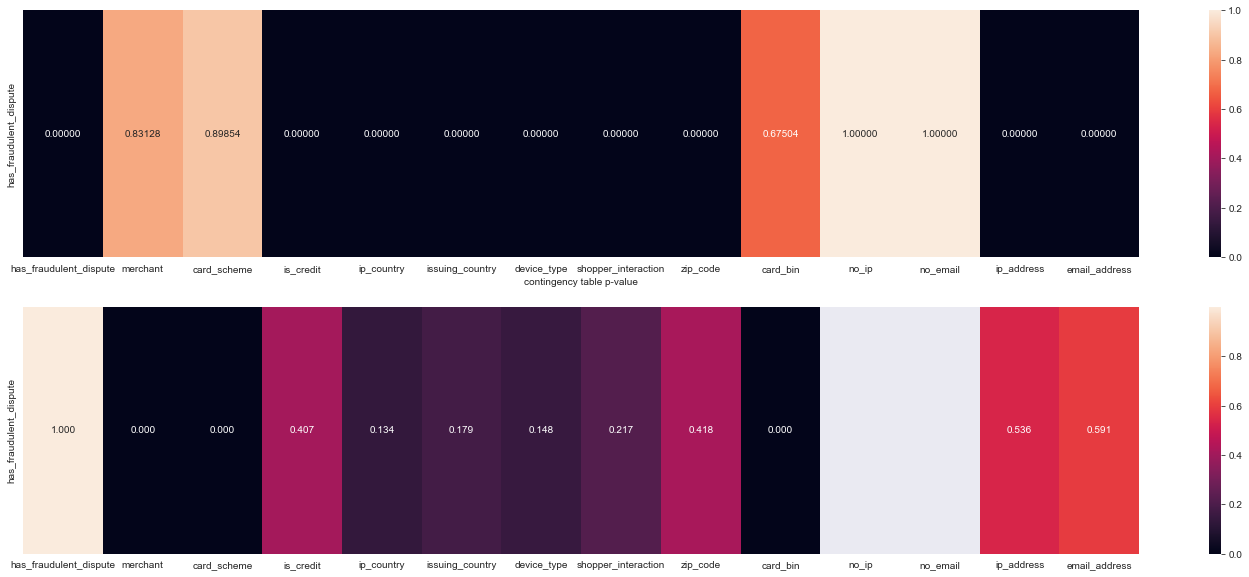

In [7]:
%reload_ext autoreload
from lib.correlation import cramers_v

cramerv = pd.DataFrame(index=['has_fraudulent_dispute'], columns=df_categorical.columns)
cramerv_sig = cramerv.copy()
columns = df_categorical.columns
for j in range(0, len(columns)):
    v, p = cramers_v(df_categorical['has_fraudulent_dispute'].tolist(), df_categorical[columns[j]].tolist())
    cramerv_sig.loc[:, columns[j]] = p
    cramerv.loc[:, columns[j]] = v

fig, axes = plt.subplots(2,1, figsize=(25, 10))
s1 = sns.heatmap(cramerv_sig, ax=axes[0], annot=True, fmt='.5f')
s1.set(xlabel='contingency table p-value')
sns.heatmap(cramerv, ax=axes[1], annot=True, fmt='.3f')
plt.show()

Using Theil U

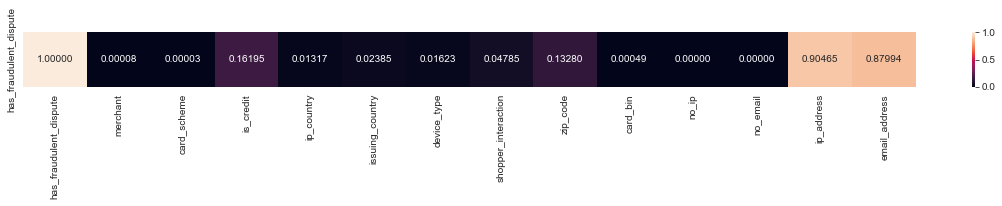

In [8]:
%reload_ext autoreload
from lib.correlation import theil_u

theilu = pd.DataFrame(index=['has_fraudulent_dispute'],columns=df_categorical.columns)
columns = df_categorical.columns
for j in range(0,len(columns)):
    u = theil_u(df_categorical['has_fraudulent_dispute'].tolist(),df_categorical[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.5f')
plt.show()

Test difference between fraud and eur_amount

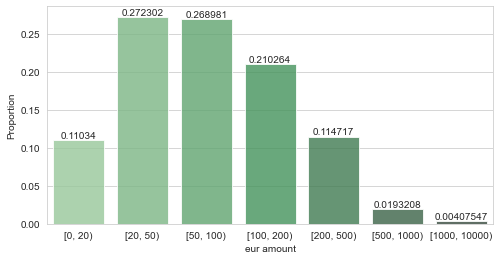

In [9]:
df_eur_amount = pd.cut( df_sample[df_sample['has_fraudulent_dispute'] == 1]['eur_amount'], [0,20,50,100,200,500,1000,10000],right=False)
value_counts = df_eur_amount.value_counts(normalize=True)
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x=value_counts.index, y=value_counts.values,alpha=0.8,palette=("Greens_d"))
ax.set_xlabel('eur amount')
ax.set_ylabel('Proportion')
ax.bar_label(ax.containers[0])
plt.show()

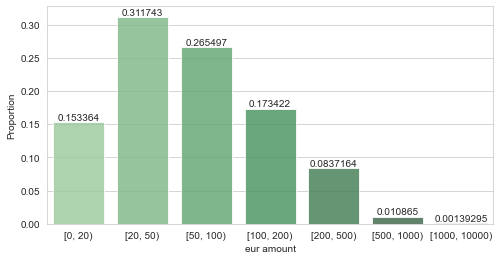

In [10]:
df_eur_amount = pd.cut( df_sample[df_sample['has_fraudulent_dispute'] == 0]['eur_amount'], [0,20,50,100,200,500,1000,10000],right=False)
value_counts = df_eur_amount.value_counts(normalize=True)
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.set_color_codes("muted")
ax = sns.barplot(x=value_counts.index, y=value_counts.values,alpha=0.8,palette=("Greens_d"))
ax.set_xlabel('eur amount')
ax.set_ylabel('Proportion')
ax.bar_label(ax.containers[0])
plt.show()

In [11]:
eur_amount_fraud = df_sample[df_sample['has_fraudulent_dispute'] == 1]['eur_amount']
eur_amount_nofraud = df_sample[df_sample['has_fraudulent_dispute'] == 0]['eur_amount']
ss.ranksums(eur_amount_fraud,eur_amount_nofraud)

RanksumsResult(statistic=12.162883956492038, pvalue=4.899781586444215e-34)

PCA 降维可视化

In [12]:
from category_encoders import WOEEncoder

# one hot encoding
df_categorical_dummies  = df_categorical.copy()[['has_fraudulent_dispute']]
credit_dummies = pd.get_dummies(df_categorical.is_credit, prefix='credit')
ip_country_dummies = pd.get_dummies(df_categorical.ip_country, prefix='ip_country')
issuing_country_dummies = pd.get_dummies(df_categorical.issuing_country, prefix='issuing_country')
device_type_dummies = pd.get_dummies(df_categorical.device_type, prefix='device_type')
shopper_interaction_dummies = pd.get_dummies(df_categorical.shopper_interaction, prefix='shopper_interaction')
zip_code_dummies = pd.get_dummies(df_categorical.zip_code, prefix='zip_code')


# woe encoding
enc1 = WOEEncoder()
ip_address_dummies = enc1.fit_transform(X=df_categorical.ip_address, y=df_categorical.has_fraudulent_dispute.values.tolist())
enc2 = WOEEncoder()
email_address_dummies = enc2.fit_transform(X=df_categorical.email_address, y=df_categorical.has_fraudulent_dispute.values.tolist())

# df_categorical_dummies = pd.concat([df_categorical_dummies,credit_dummies,ip_country_dummies,issuing_country_dummies,device_type_dummies,shopper_interaction_dummies,ip_address_dummies,email_address_dummies], axis=1)

df_categorical_dummies = pd.concat([df_categorical_dummies,credit_dummies,ip_address_dummies,email_address_dummies], axis=1)
df_categorical_dummies.head()

from lib.preprocessing import standardize
df_eur_amount_standard =  standardize(df_sample[['eur_amount']])

df_dummies = pd.concat([df_categorical_dummies,df_eur_amount_standard], axis=1)
df_dummies.head()

,has_fraudulent_dispute,credit_False,credit_True,ip_address,email_address,eur_amount
110065,False,0,1,-1.018326,-1.018326,0.012678
118598,False,0,1,0.000000,0.000000,-0.131045
14202,False,0,1,0.000000,0.000000,-0.534246
99100,False,0,1,0.000000,0.000000,0.324649
118416,False,0,1,0.000000,0.000000,-0.379292


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.60298465 0.27174219]
['credit_False' 'credit_True' 'eur_amount' 'ip_address' 'email_address']


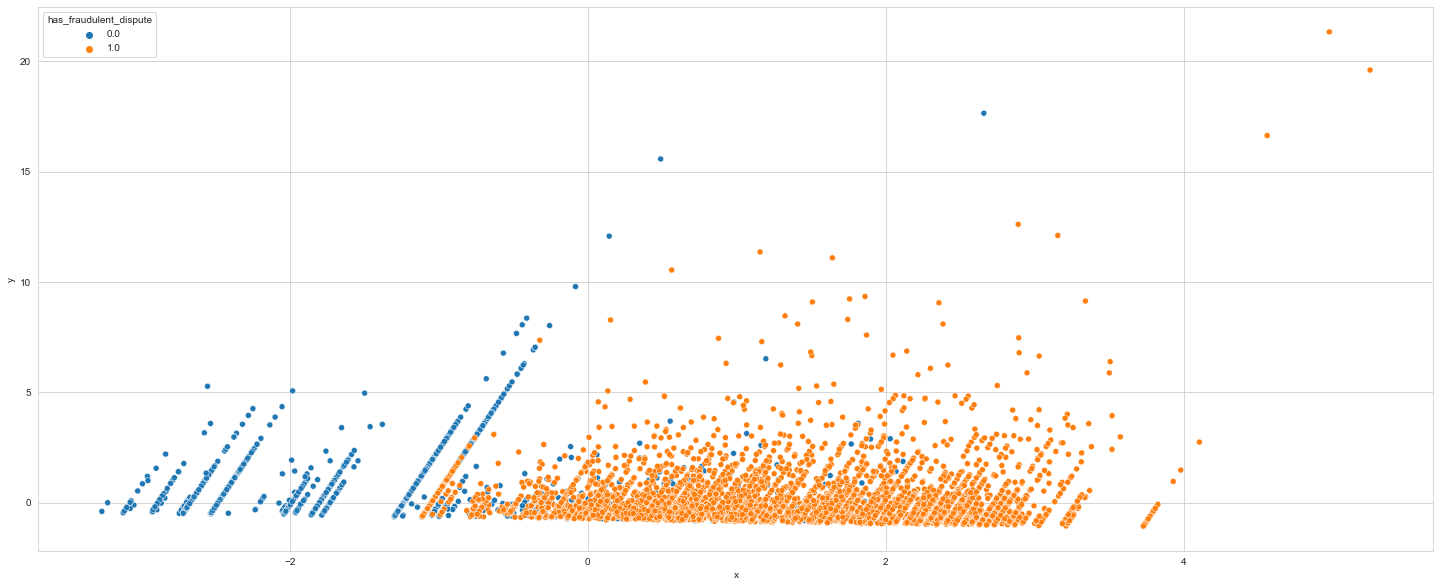

In [13]:
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_dummies,target="has_fraudulent_dispute",n_components=2)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.60298465 0.27174219 0.0666976 ]
['credit_False' 'credit_True' 'eur_amount' 'ip_address' 'email_address']


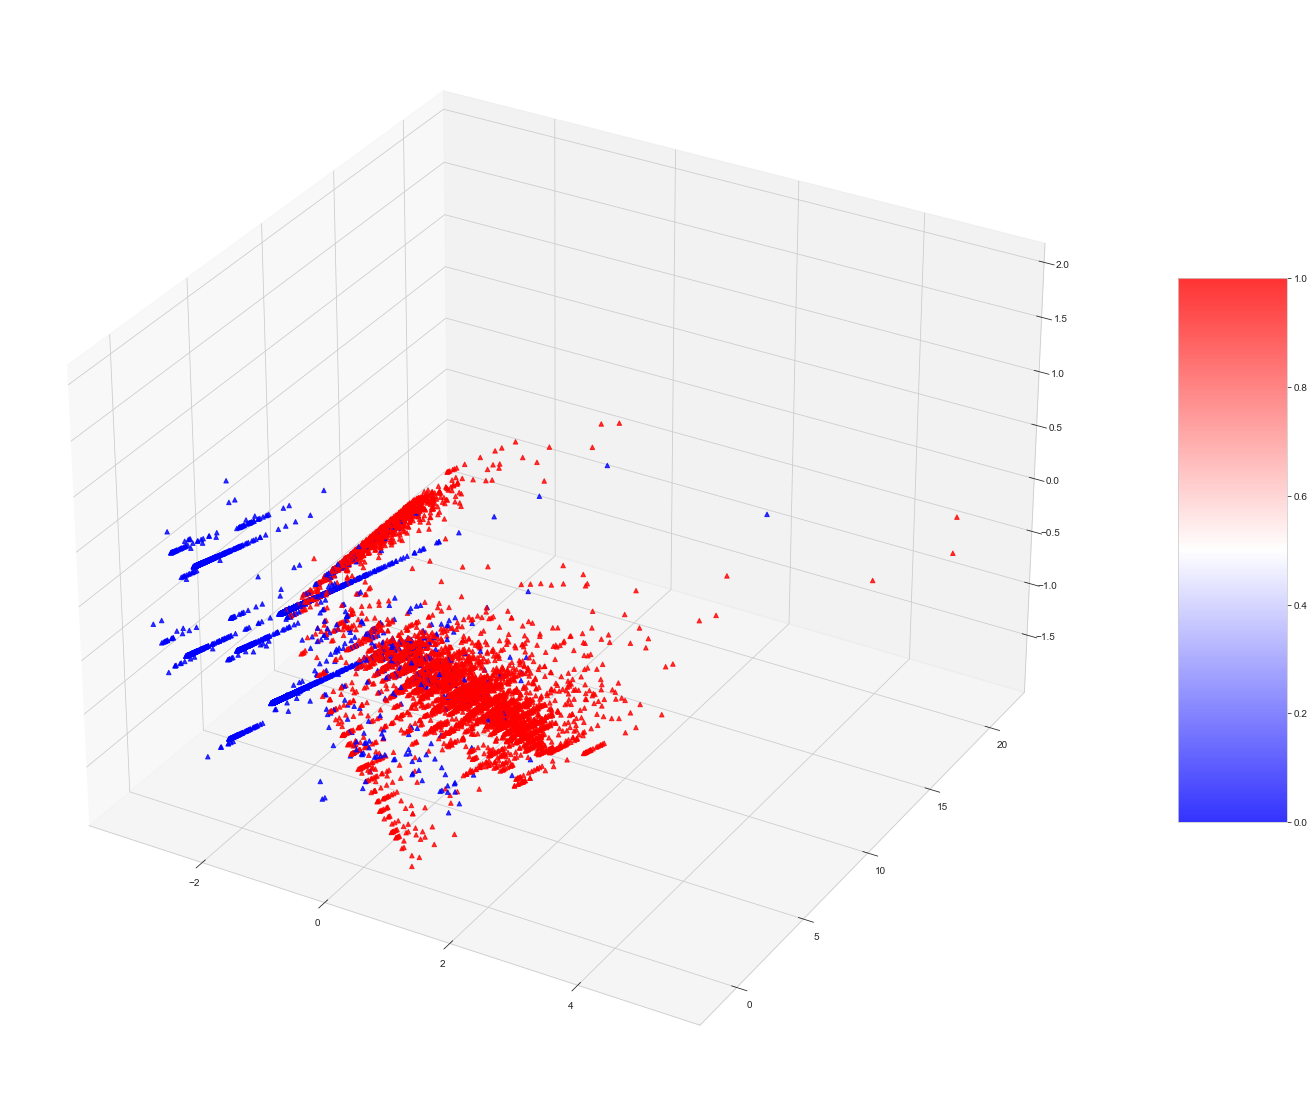

In [14]:
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_dummies,target="has_fraudulent_dispute",n_components=3)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.8271991  0.09200883]
['credit_False' 'credit_True' 'ip_address' 'email_address']


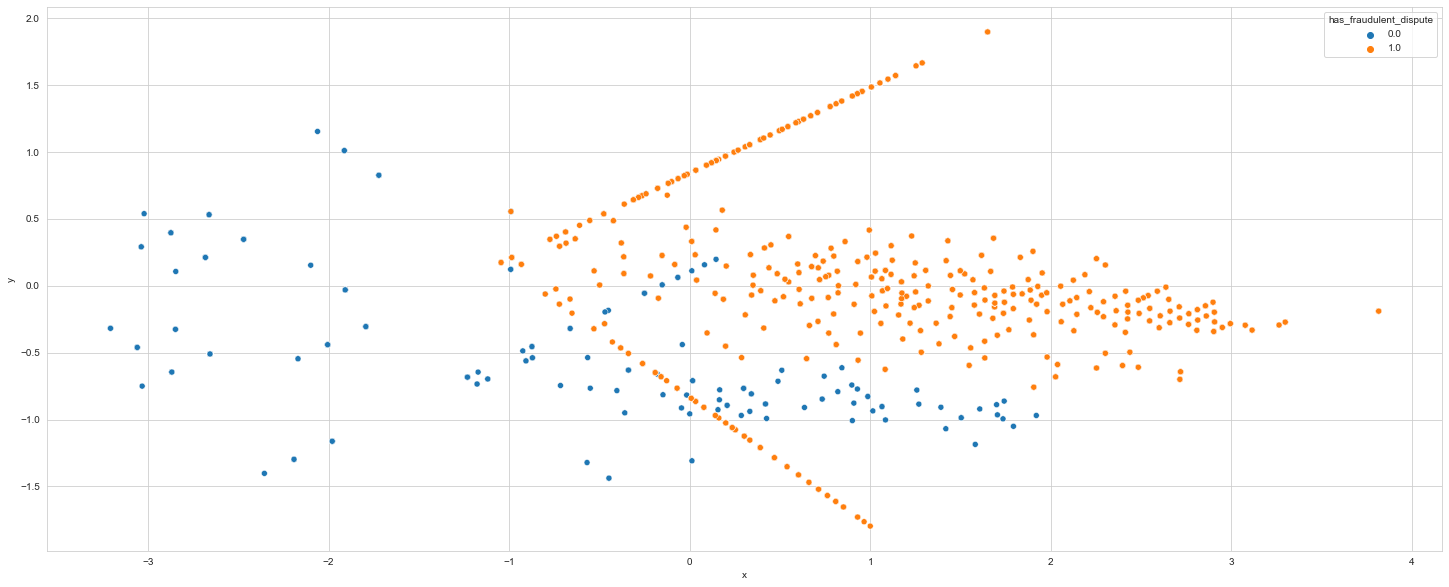

In [15]:
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_categorical_dummies,target="has_fraudulent_dispute",n_components=2)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.8271991  0.09200883 0.08079208]
['credit_False' 'credit_True' 'ip_address' 'email_address']


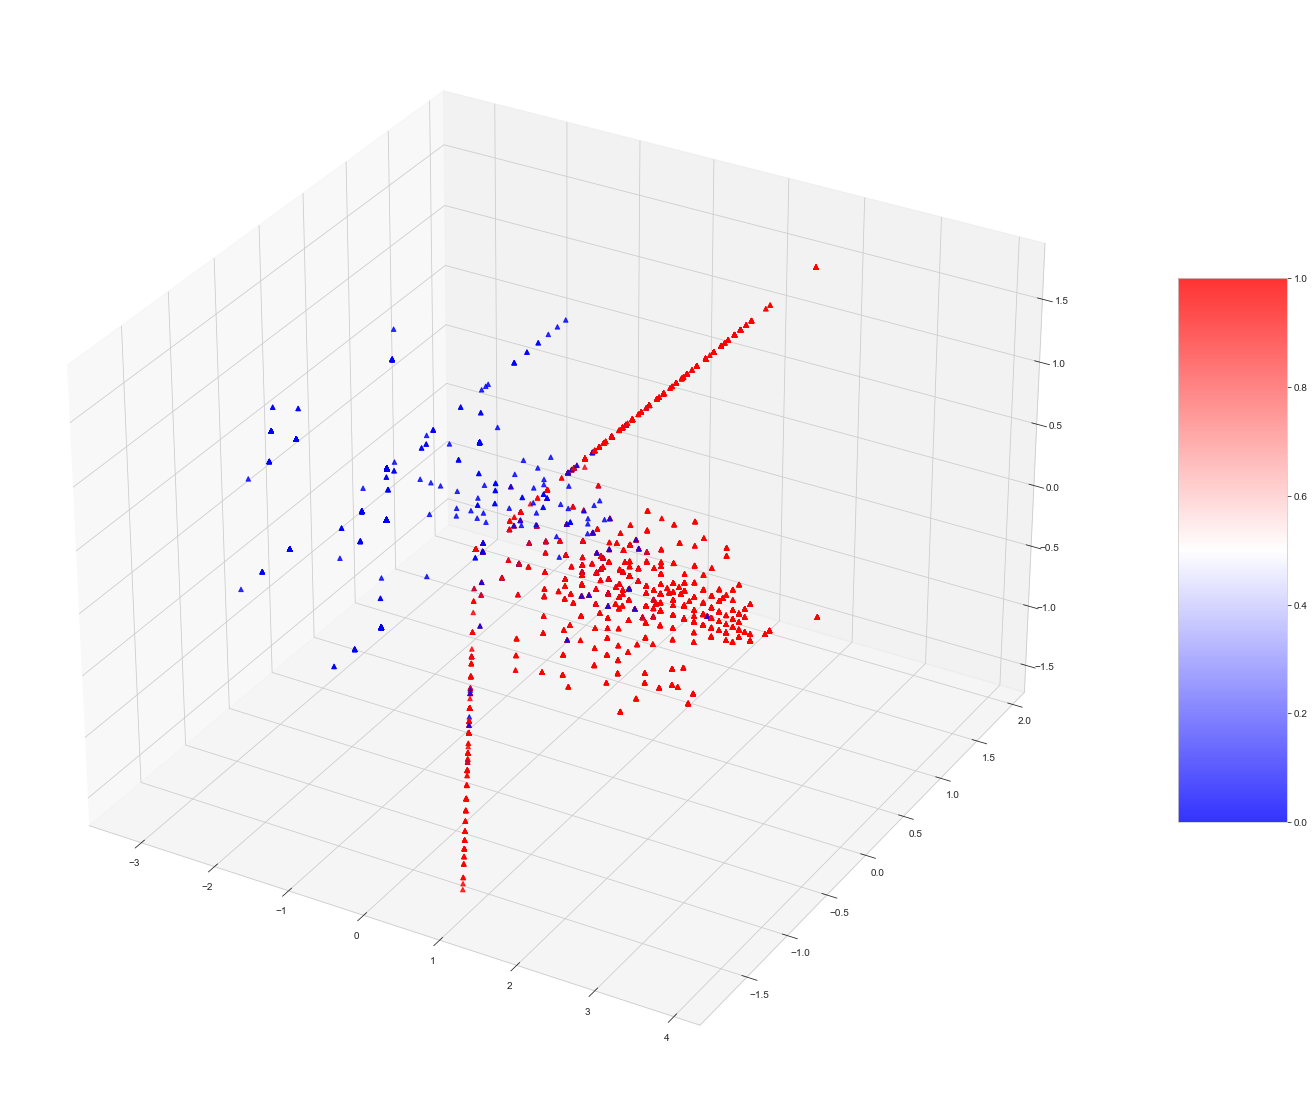

In [16]:
%load_ext autoreload
%autoreload
from lib.visualization import DrawPCA

drawPCA = DrawPCA(df=df_categorical_dummies,target="has_fraudulent_dispute",n_components=3)
drawPCA.draw()
print(drawPCA.pca.explained_variance_ratio_)
print(drawPCA.pca.feature_names_in_[drawPCA.pca.components_[0].argsort()])